### Import the packages

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

### Load the Dataset

In [3]:
data = pd.read_csv('Dataset\Telecom-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Shape of the data
data.shape

(7043, 21)

In [5]:
# Columns present in the dataset
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
# Type of data in each column
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# Statistics
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Observation:
1. 75% people have tenure less than 55 months.
2. The average monthly charges (i.e. USD 64.76) are less than what 25% people pay (i.e. more than USD 89.85).

Text(0, 0.5, 'Target Variable: Churn')

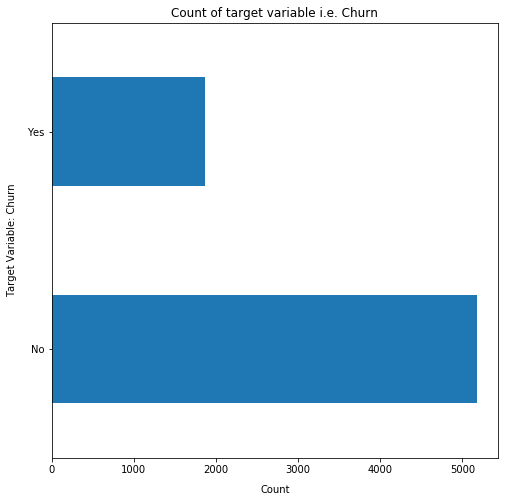

In [8]:
# Graph: Count of target variable i.e. Churn
data['Churn'].value_counts().plot(kind = 'barh', figsize = (8,8))
plt.title('Count of target variable i.e. Churn')
plt.xlabel('Count',labelpad=10)
plt.ylabel('Target Variable: Churn',labelpad=10)

In [9]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [10]:
# Calculating percentage of both the categories
( data['Churn'].value_counts() / len(data['Churn']) ) * 100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

Observation:

Data is highly imbalanced.

In [11]:
# To print the full summary set verbose to true
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [12]:
# Check for missing values
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Observation:
1. There is no missing values present in the dataset.

### Data Cleaning

In [13]:
# Creating a copy of the dataset
data1 = data.copy()

In [14]:
data1.TotalCharges.dtype

dtype('O')

As the type of TotalCharges is not numeric we need to convert it.

In [15]:
# Converting to numeric datatype
data1.TotalCharges = pd.to_numeric(data1.TotalCharges, errors='coerce')

When we assign the argument errors = 'coerce' this means that while converting if any value is invalid return NaN in place of it. Therefore now we need to check for null values again.

In [16]:
# Checking for null values
data1.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
# Calculating the percent of missing values in TotalCharges
data1.TotalCharges.isna().sum() / data1.TotalCharges.count() * 100

0.15642775881683732

As the missing data is very low i.e. 0.15% we can drop these values

In [18]:
# Dropping the rows in which any feature is NaN i.e. why we set the argument how to 'any'
data1.dropna(how = 'any' , inplace=True)

Now we divide the values in tenure to groups like 1-12, 13-24, 25-36 and so on

In [19]:
# Calculating the highest tenure value
data1.tenure.max()

72

In [20]:
l = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
data1['tenureGroup'] = pd.cut(data1.tenure, range(1,80,12), right=False, labels=l)
data1.tenureGroup.value_counts()

1 - 12     2175
61 - 72    1407
13 - 24    1024
49 - 60     832
25 - 36     832
37 - 48     762
Name: tenureGroup, dtype: int64

In [21]:
# Removing the columns that are not required
data1.drop(columns=['tenure','customerID'],axis=1,inplace=True)

### Univariate Analysis 

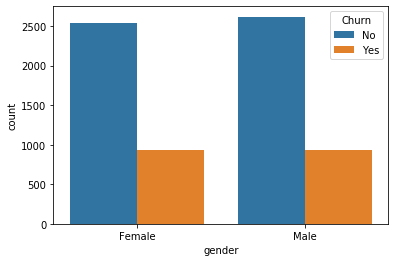

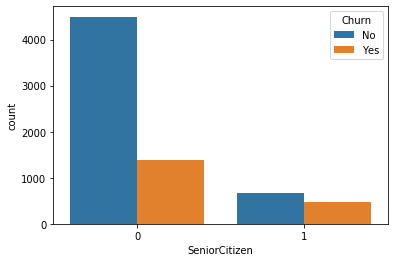

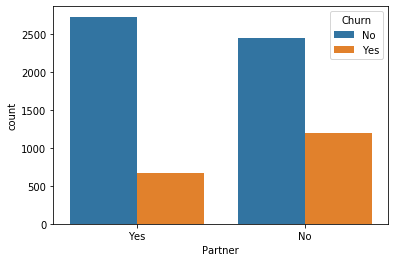

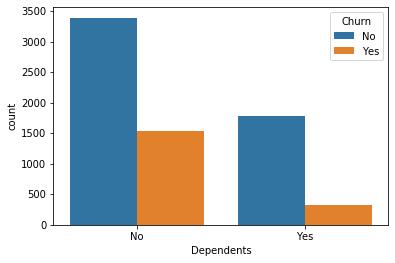

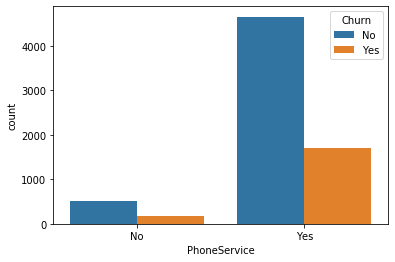

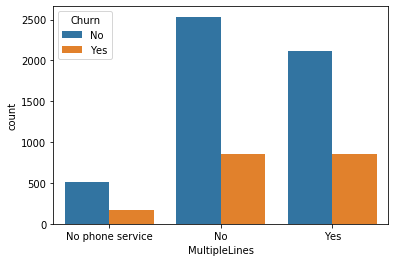

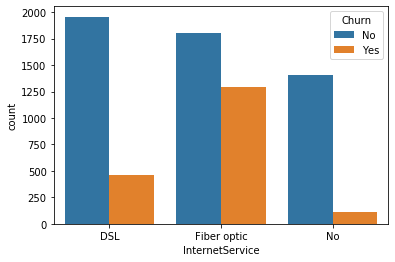

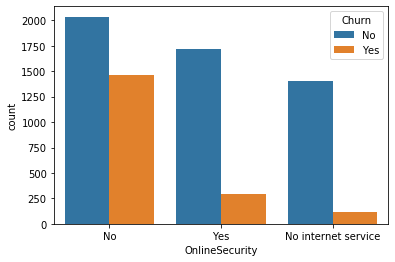

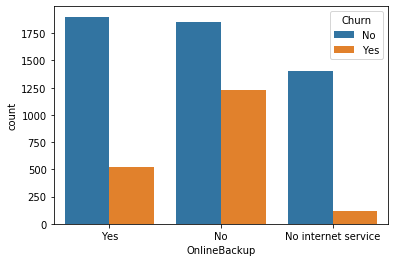

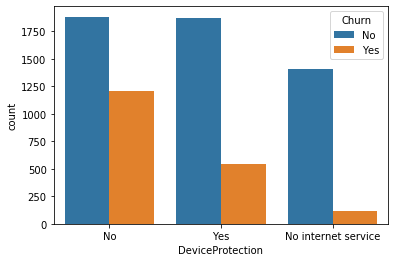

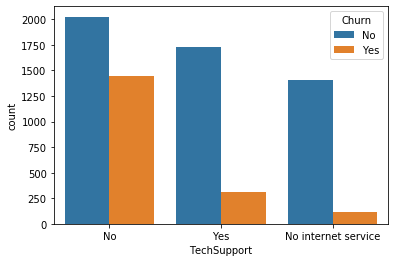

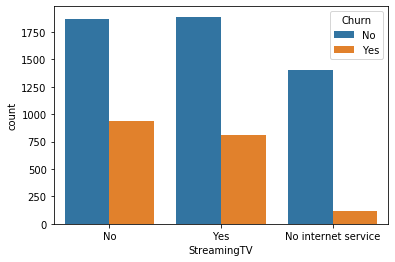

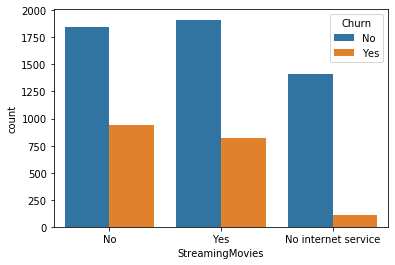

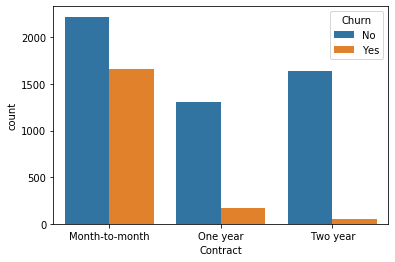

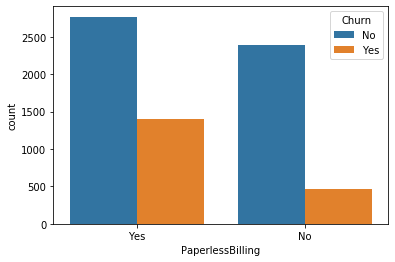

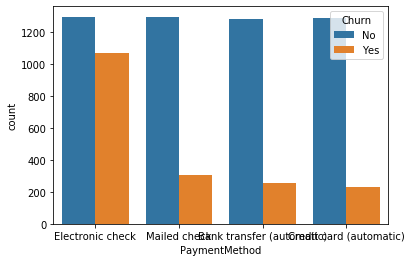

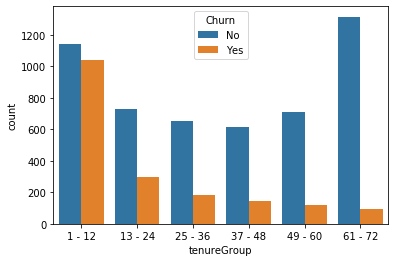

In [22]:
# Plotting graph between each feature and churn
for i,feature in enumerate(data1.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=data1, x=feature, hue='Churn')

In [23]:
# Converting categorical feature into continuous
data1['Churn'] = np.where(data1.Churn == 'Yes',1,0)
data1.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenureGroup
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


In [24]:
# Converting all categorical features to dummy features
data1_dummy = pd.get_dummies(data1)
data1_dummy.head()

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenureGroup_1 - 12,tenureGroup_13 - 24,tenureGroup_25 - 36,tenureGroup_37 - 48,tenureGroup_49 - 60,tenureGroup_61 - 72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


Text(0, 0.5, 'Total charges')

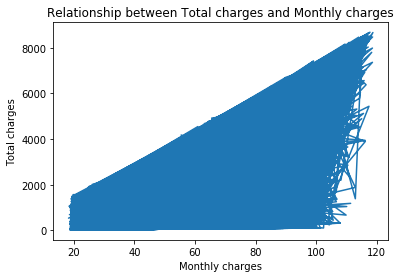

In [26]:
plt.plot(data1_dummy.MonthlyCharges,data1_dummy.TotalCharges)
plt.title('Relationship between Total charges and Monthly charges')
plt.xlabel('Monthly charges')
plt.ylabel('Total charges')

Observation:
1. Total charges increase as monthly charges increase
2. Proportional relationship

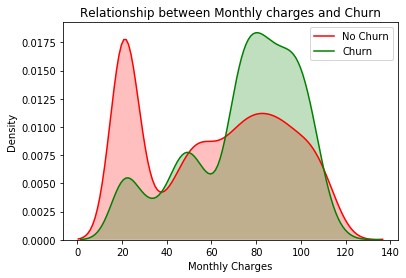

In [28]:
# Relationship between Monthly charges and Churn
fig = sns.kdeplot(data1_dummy.MonthlyCharges[data1_dummy.Churn == 0], color = 'red',shade = True)
fig = sns.kdeplot(data1_dummy.MonthlyCharges[data1_dummy.Churn == 1], color = 'green', shade= True)
fig.set_title('Relationship between Monthly charges and Churn')
fig.set_xlabel('Monthly Charges')
fig.set_ylabel('Density')
fig.legend(['No Churn','Churn'],loc = 'upper right')

Observation:
Churn is more when monthly charges are high.


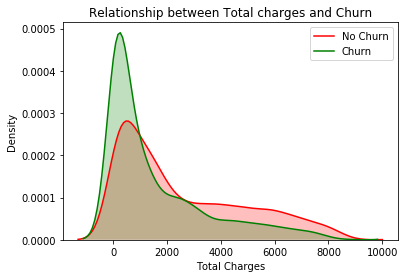

In [29]:
# Relationship between Total charges and Churn
fig2 = sns.kdeplot(data1_dummy.TotalCharges[data1_dummy.Churn == 0], color = 'red', shade = True)
fig2 = sns.kdeplot(data1_dummy.TotalCharges[data1_dummy.Churn == 1], color = 'green', shade = True)
fig2.set_title('Relationship between Total charges and Churn')
fig2.set_xlabel('Total Charges')
fig2.set_ylabel('Density')
fig2.legend(['No Churn','Churn'],loc = 'upper right')

Obseravtion:
Surprisingly, lower total charges have higher churn rate.

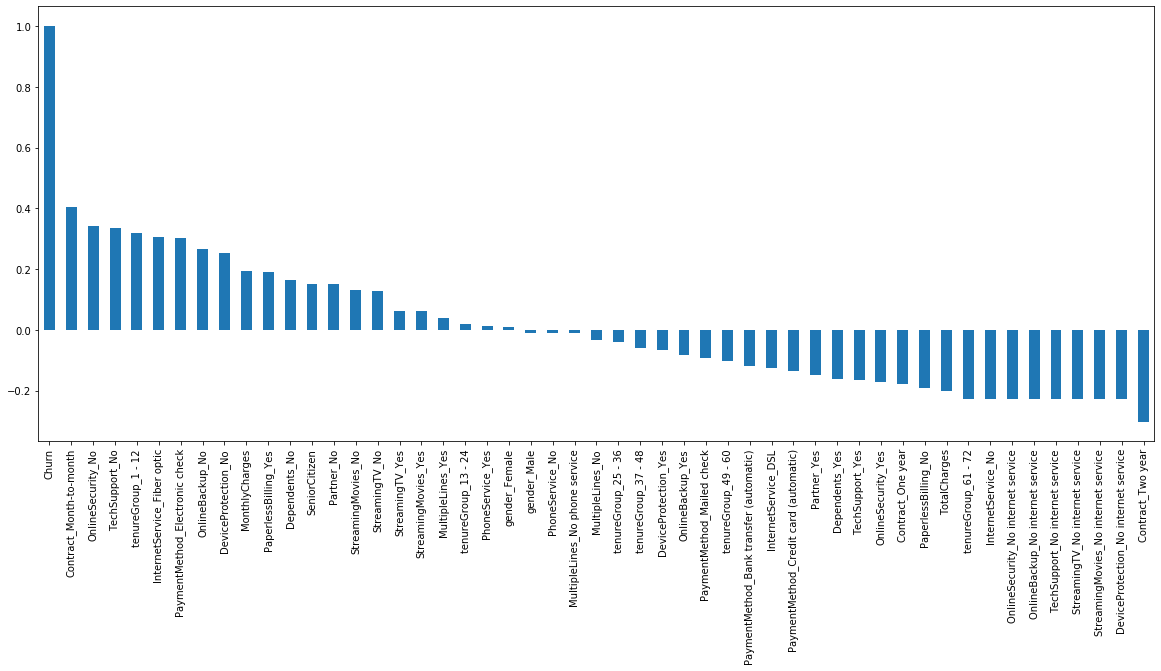

In [30]:
plt.figure(figsize=(20,8))
data1_dummy.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

Observation:
1. Low Churn : This is seen in case of subscription without internet service, long term contracts and 5+ years of engagement.
2. High Churn : This is seen in case of month to month contracts, no tech support, one year of tenure and internet service of fiber optic.
3. Features like gender, availability of phone service and multiple lines have no impact on the churn.

### Bivariate Analysis

In [31]:
target0 = data1.loc[data1['Churn'] == 0]
target1 = data1.loc[data1['Churn'] == 1]

In [39]:
def uniplot(df,col,title,hue =None):
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    plt.rcParams["axes.labelsize"] = 20
    plt.rcParams['axes.titlesize'] = 22
    plt.rcParams['axes.titlepad'] = 30
    
    
    temp = pd.Series(data = hue)
    fig, ax = plt.subplots()
    width = len(df[col].unique()) + 7 + 4*len(temp.unique())
    fig.set_size_inches(width , 8)
    plt.yscale('log')
    plt.title(title)
    ax = sns.countplot(data = df, x= col, order=df[col].value_counts().index,hue = hue,palette='bright') 
        
    plt.show()

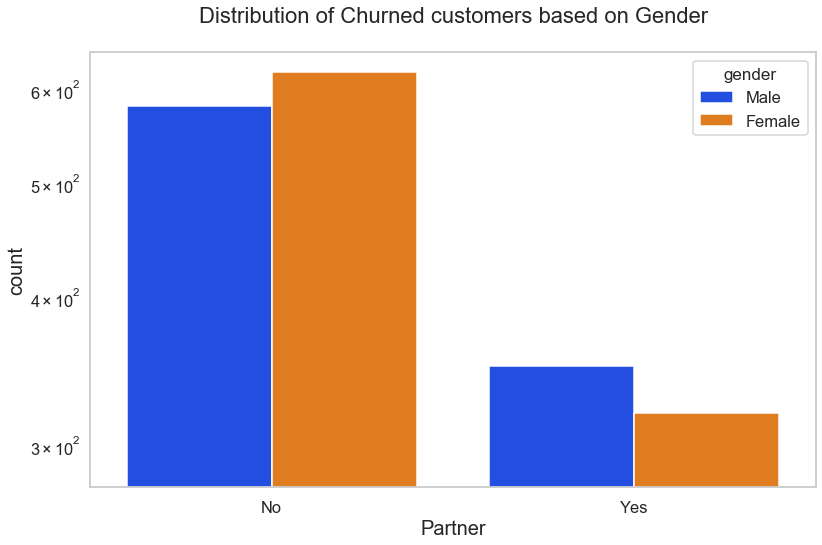

In [40]:
uniplot(target1,col='Partner',title='Distribution of Churned customers based on Gender',hue='gender')

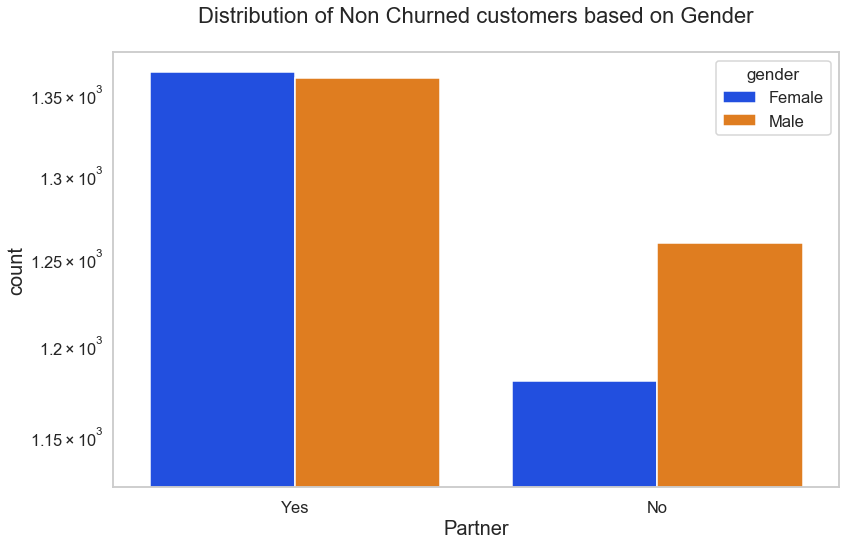

In [41]:
uniplot(target0,col='Partner',title='Distribution of Non Churned customers based on Gender',hue='gender')

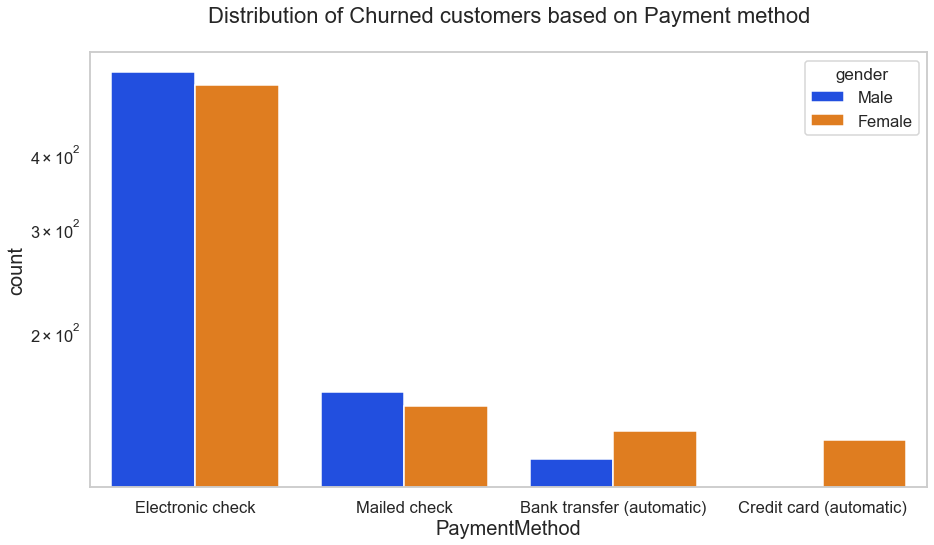

In [42]:
uniplot(target1,col='PaymentMethod',title='Distribution of Churned customers based on Payment method',hue='gender')

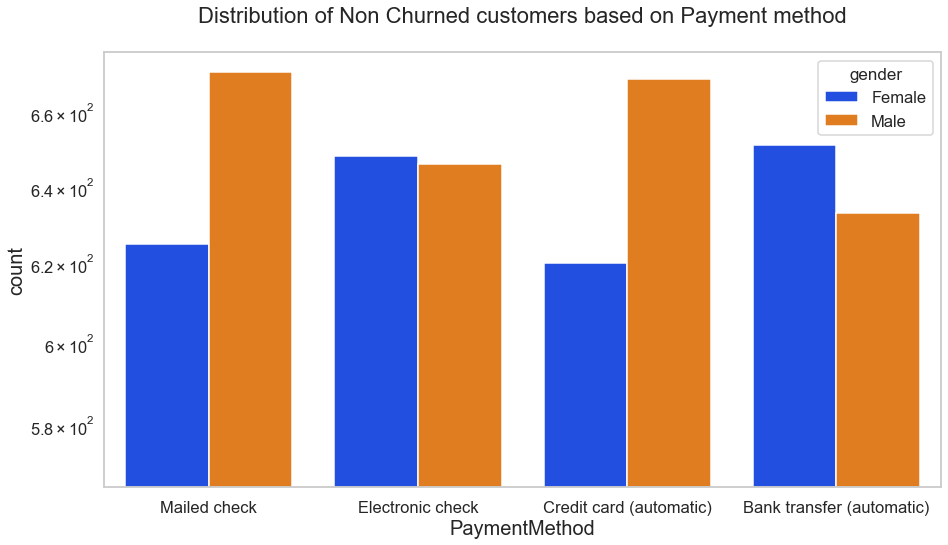

In [43]:
uniplot(target0,col='PaymentMethod',title='Distribution of Non Churned customers based on Payment method',hue='gender')

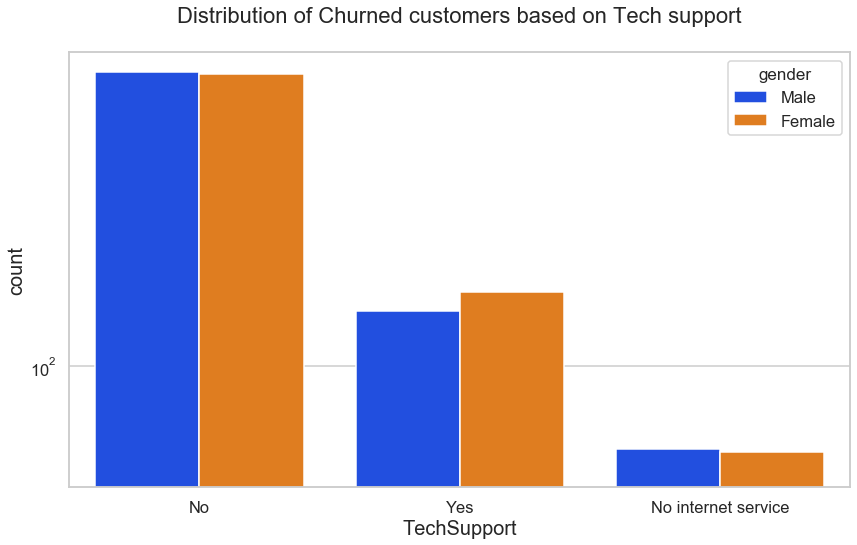

In [44]:
uniplot(target1,col='TechSupport',title='Distribution of Churned customers based on Tech support',hue='gender')

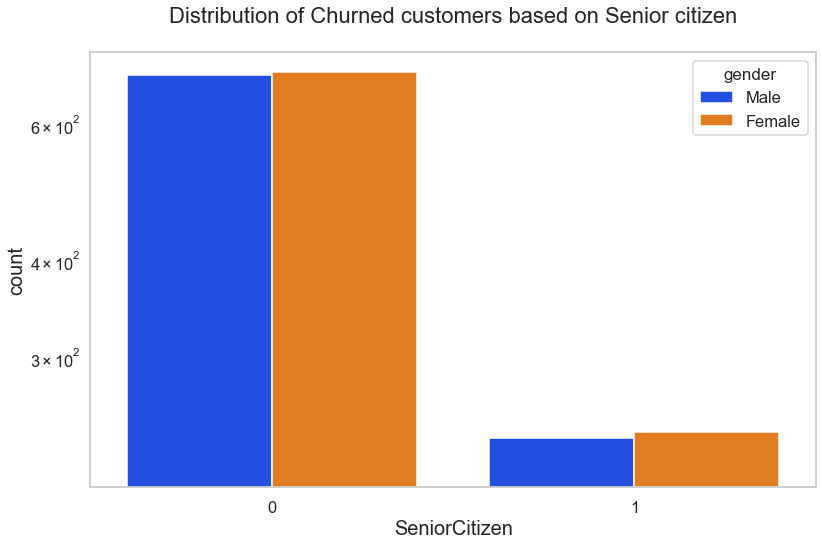

In [45]:
uniplot(target1,col='SeniorCitizen',title='Distribution of Churned customers based on Senior citizen',hue='gender')

In [46]:
data1_dummy.to_csv('Dataset\Telcom_Churn.csv')